In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#set file paths
file='Table2.xlsx'
csvfile_output='./Output/Output_Washington.csv'
pngfile_tax_pie = './Output/Tax_pie_Wa'

# read data from csv
wa_raw=pd.read_excel(file, skiprows=4)

In [2]:
wa_raw.head()

,Unnamed: 0,Source,2013,2014,2015,2016,2017
0,ALL STATE TAXES,NaN,1.702770e+07,1.778375e+07,1.872368e+07,2.036968e+07,2.204317e+07
1,General & Selective Sales Taxes,NaN,9.812069e+06,1.037677e+07,1.096246e+07,1.214443e+07,1.322349e+07
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retail Sales,7.180526e+06,7.720827e+06,8.255132e+06,8.979623e+06,9.514975e+06
4,NaN,Use,5.241007e+05,5.649962e+05,5.928567e+05,6.438798e+05,6.827372e+05


In [3]:
# Extract important data
total_wa=wa_raw[wa_raw['Unnamed: 0']=='ALL STATE TAXES']
sales_wa=wa_raw[wa_raw['Unnamed: 0']=='General & Selective Sales Taxes']
wa_raw=wa_raw.drop(columns=['Unnamed: 0'])
total_revenue=total_wa.drop(columns=['Unnamed: 0','Source'])
total_sales=sales_wa.drop(columns=['Unnamed: 0','Source'])

# Tobacco
tobacco_wa=wa_raw[wa_raw['Source']=='Tobacco Products']
tobacco_wa=tobacco_wa.drop(columns=['Source'])

# Alcohol, liquor
alcohol_wa=wa_raw[wa_raw['Source']=='Liquor Sales']
alcohol_wa=alcohol_wa.drop(columns=['Source'])

# Marijuana
marijuana_wa=wa_raw[wa_raw['Source']=='Marijuana Excise']
marijuana_wa=marijuana_wa.drop(columns=['Source'])

In [4]:
# Create DataFrame
wa=[total_revenue,total_sales,tobacco_wa,alcohol_wa,marijuana_wa]
df=pd.concat(wa)
df=df*1000

In [5]:
# Transpose DataFrame
df=df.T
# Rename, reindexing for final output
df=df.rename(index=str, columns={0:"Total Revenue",1:"Total Sales Tax",8:"Total Tobacco Sales Tax",6:"Total Alcohol Sales Tax",7:"Total Marijuana Sales Tax"})
df['State']='Washington'
df=df.rename_axis('Year')
df=df.reset_index()
df=df[["Year","State","Total Revenue","Total Sales Tax","Total Tobacco Sales Tax","Total Alcohol Sales Tax","Total Marijuana Sales Tax"]]


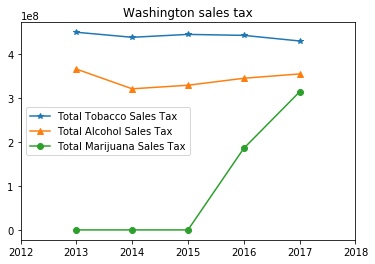

In [6]:
x_axis=[2013,2014,2015,2016,2017]
fig, ax = plt.subplots()

ax.plot(x_axis, df["Total Tobacco Sales Tax"], marker='*', )
ax.plot(x_axis, df["Total Alcohol Sales Tax"], marker='^')
ax.plot(x_axis, df["Total Marijuana Sales Tax"], marker='o')
plt.xlim(2012,2018)
plt.legend()
plt.title('Washington sales tax')
plt.savefig("./Output/timeline.png")
plt.show()


In [7]:
# Add percentage columns
df["Tobacco's Share of Total Sales Tax %"]   = df["Total Tobacco Sales Tax"] * 100 / \
                                                df["Total Sales Tax"]
df["Alchohol's Share of Total Sales Tax %"]  = df["Total Alcohol Sales Tax"] * 100 / \
                                                df["Total Sales Tax"]
df["Marijuana's Share of Total Sales Tax %"] = df["Total Marijuana Sales Tax"] * 100 / \
                                                df["Total Sales Tax"]

# Save file
df.to_csv(csvfile_output)
df

,Year,State,Total Revenue,Total Sales Tax,Total Tobacco Sales Tax,Total Alcohol Sales Tax,Total Marijuana Sales Tax,Tobacco's Share of Total Sales Tax %,Alchohol's Share of Total Sales Tax %,Marijuana's Share of Total Sales Tax %
0,2013,Washington,1.702770e+10,9.812069e+09,4.502512e+08,3.663542e+08,0.000000e+00,4.588748,3.733710,0.000000
1,2014,Washington,1.778375e+10,1.037677e+10,4.387599e+08,3.213919e+08,0.000000e+00,4.228291,3.097226,0.000000
2,2015,Washington,1.872368e+10,1.096246e+10,4.453407e+08,3.295365e+08,0.000000e+00,4.062415,3.006045,0.000000
3,2016,Washington,2.036968e+10,1.214443e+10,4.431278e+08,3.454249e+08,1.857617e+08,3.648817,2.844308,1.529605
4,2017,Washington,2.204317e+10,1.322349e+10,4.303358e+08,3.552876e+08,3.144598e+08,3.254328,2.686792,2.378039


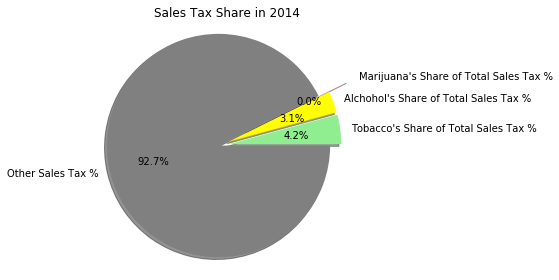

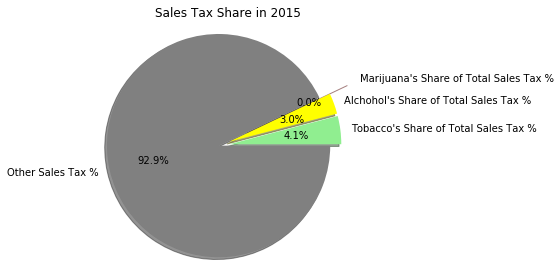

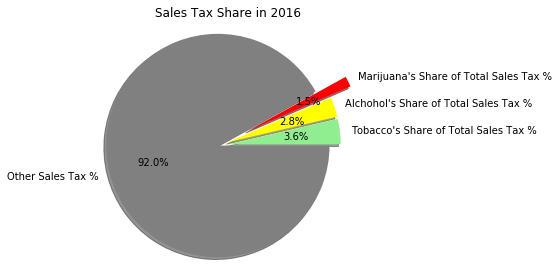

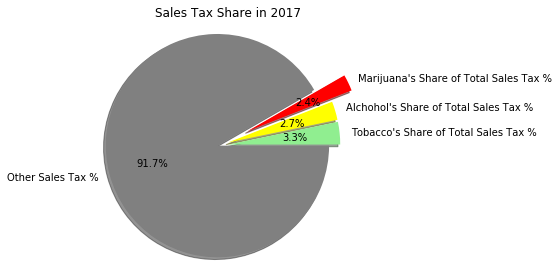

In [8]:

# Plot the sales tax share from 2014 to 2017
lt_year = ["2014", "2015", "2016", "2017"]

for pie_year in lt_year:

    # Labels for the sections of our pie chart
    lt_labels = ["Tobacco's Share of Total Sales Tax %", 
                 "Alchohol's Share of Total Sales Tax %", 
                 "Marijuana's Share of Total Sales Tax %", 
                 "Other Sales Tax %"]

    # The values of each section of the pie chart
    lt_sizes = df.loc[(df["Year"]==pie_year), 
                             "Tobacco's Share of Total Sales Tax %"].tolist()
    lt_sizes.append(df.loc[(df["Year"]==pie_year), 
                             "Alchohol's Share of Total Sales Tax %"].tolist()[0])
    lt_sizes.append(df.loc[(df["Year"]==pie_year), 
                             "Marijuana's Share of Total Sales Tax %"].tolist()[0])
    lt_sizes.append(100-(lt_sizes[0]+lt_sizes[1]+lt_sizes[2]))

    # The colors of each section of the pie chart
    lt_colors = ["lightgreen", "yellow", "red", "gray"]
    # Tells matplotlib to seperate sections
    list_explode = (0.1, 0.1, 0.3, 0)

    # Creates the pie chart with automatic percentages value created
    plt.pie(lt_sizes, explode=list_explode, labels=lt_labels, colors=lt_colors,
            autopct="%1.1f%%", shadow=True, startangle=0)
    plt.axis("equal")
    plt.title(f"Sales Tax Share in {pie_year}")
    plt.tight_layout()

    # Save and show
    plt.savefig(f"{pngfile_tax_pie}_{pie_year}.png")
    plt.show()